In [1]:
import math
import random

def is_prime(n):
    for i in range(2, n // 2):
        if n % i == 0: 
            return False
    return True

def gcd(a: int, b: int) -> int:
    return b if a == 0 else gcd(b % a, a) 


#### Фунція Ейлера
Функція Ейлера — це цілочисельна функція рівна кількості натуральних чисел, не більших за n і взаємно простих з ним.<br>
http://e-maxx.ru/algo/export_euler_function <br>
http://www.geeksforgeeks.org/eulers-totient-function/

In [2]:

def euler_function(n: int) -> int:
    s = 0
    for i in range(n):
        if gcd(i, n) == 1:
            
            s += 1
    return s

#### Фунція Мебіуса
https://en.wikipedia.org/wiki/M%C3%B6bius_function <br>
https://en.wikipedia.org/wiki/Square-free_integer <br>
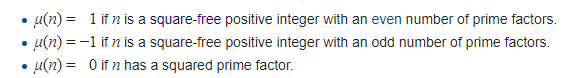

In [3]:
def is_square_free (n):
    for i in range(2, round(n**0.5 + 1)):
        if n % (i**2) == 0:
            return False
    return True

def factor_number(n):
    primaries = set()
    while (n > 1):
        for i in range(2, n + 1):
            if n % i == 0 and is_prime(i):
                n //= i
                primaries.add(i)

                break
            
    return len(primaries)

def mobius_function (n):
    if (n == 1):
        return 1
    elif (not is_square_free(n)):
        return 0
    else:                
        return (-1) ** factor_number(n)

#### Символ Якобі
Квадратичний лишок - https://en.wikipedia.org/wiki/Quadratic_residue <br>
Символ Якобі - https://en.wikipedia.org/wiki/Jacobi_symbol <br>
Правила для символу Якобі - https://goo.gl/2LRUsJ


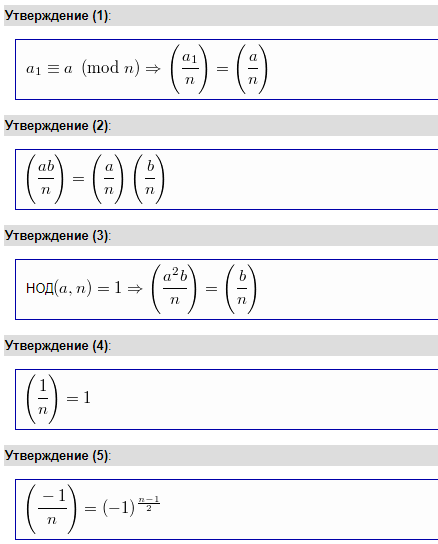<br>

In [4]:
def jacobi_symbol(a: int, p: int) -> int:
    if gcd(a, p) != 1: return 0
    if a == 1 or a == 0: return a
    
    if a < 0:
        # Для від'ємних скористаємося 
        # правилом (ab|p) = (a|p)*(b|p), щоб розбити на на -1 і a додатнє в знаменнику,
        # та (-1|n) = ((-1) ** ((p - 1) // 2)) для -1 
        s = ((-1) ** ((p - 1) // 2))
        return s * jacobi_symbol(-a, p)
    if a % 2 == 0:
        # Для парного числа скористаємося 
        # правилом (ab|p) = (a|p)*(b|p), щоб розбити на на 2 і a / 2 в знаменнику,
        # правилом (2|p) =((-1) ** ((p ** 2 - 1) // 8))
        s = ((-1) ** ((p ** 2 - 1) // 8))
        return s * jacobi_symbol(a // 2, p)
    if a < p:
        s = ((-1) ** (((a - 1) // 2)  * ((p - 1) // 2)))
        return s * jacobi_symbol(p, a)
    return jacobi_symbol(a % p, p)

def jacobi_symbol_new(a: int , b: int) -> int:
    if gcd(a, b) != 1:
        return 0
    result = 1
    if a < 0:
        a = -a
        if b % 4 == 3:
            result = -result
    while True:
        
        temp = 0
        while a % 2 == 0:
            temp = temp + 1
            a = a // 2
        if temp % 2 != 0:
            if b % 8 == 3 or b % 8 == 5: 
                result = -result
                
        if a % 4 == b % 4 == 3:
            result = -result
        
        a, b = b % a, a
        if a == 0: 
            return result


#### Символ Лежандра
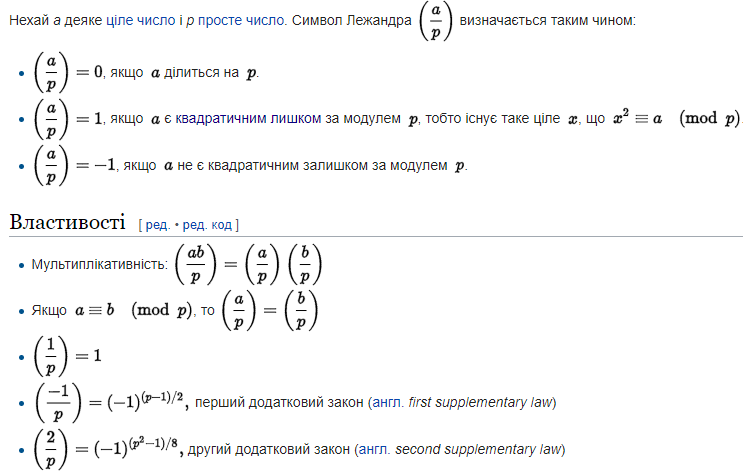

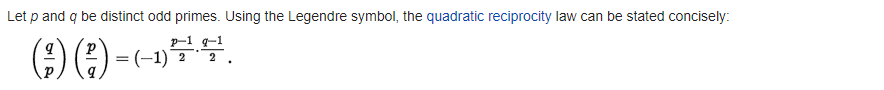

In [5]:
def legendre_symbol(a: int, p: int):
    if a == 1 or a == 0: return a
    if a % 2 == 0:
        s = (-1) ** ((p ** 2 - 1) // 8)
        return s * legendre_symbol(a // 2, p)
    
    s = ((-1)**((a - 1) * (p - 1) // 4))
    return s * legendre_symbol(p % a, a)

In [6]:
def modular_eq(a, b, m):
    return (a % m) == (b % m)

#### Теорема Прота
https://goo.gl/Mk1ezc
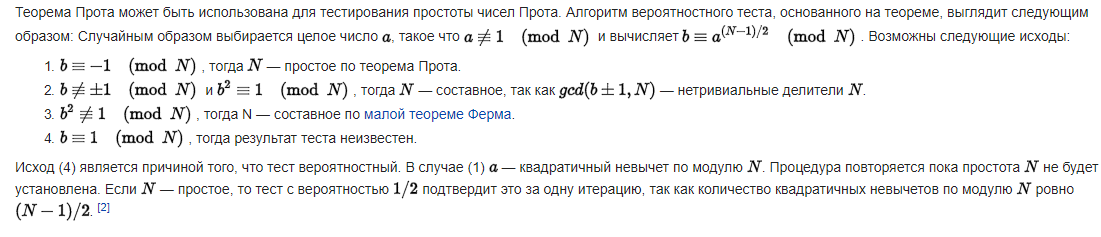

In [7]:
def proths_theorem(n: int) -> bool:
    for i in range(10):
        # choosing a randomly 
        a = random.randint(100, 1000)
        while modular_eq(a, 1, n):
            a = random.randint(100, 1000)
    
        b = a ** ((n - 1) // 2)
        
        if modular_eq(b, -1, n):
            return True
        if not modular_eq(b, 1, n) and modular_eq(b**2, 1, n):
            return False
        if not modular_eq(b **2, 1, n):
            return False
        if modular_eq(b, 1, n):
            continue
    return True

In [16]:
proths_theorem(391939)

True

#### Соловея — Штрассена
https://goo.gl/pKtxcj
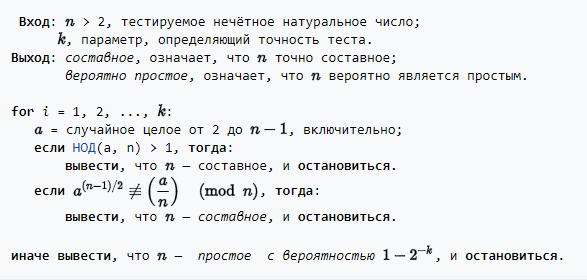

In [8]:
def solovay_strassen_test(n: int, k: int = 2) -> bool:
    if n % 2 == 0: 
        return False
    
    for i in range(k):
        a = random.randint(2, n)
        x = jacobi_symbol_new(a, n)
        if x == 0 or not modular_eq(x, a ** ((n - 1) // 2), n):
            return False
    return True

In [15]:
print(solovay_strassen_test(13))
print(solovay_strassen_test(499))
print(solovay_strassen_test(45))

True
True
False


#### Алгоритим Поларда
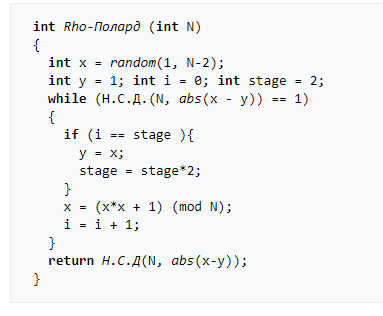

In [18]:
def pollards_rho_algorithm(n: int) -> int:
    x = random.randint(1, n - 2)
    y = 1
    i = 0
    stage = 2
    while (gcd(n, abs(x - y)) == 1):
        if i == stage:
            y = x
            stage = stage * 2
        x = (x**2 + 1) % n
        i += 1
    return gcd(n, abs(x - y))

def polard_facotrisation(n: int):
    result = []
    while n > 2:
        i = pollards_rho_algorithm(n)
        result.append(i)
        n //= i
    return result

In [19]:
polard_facotrisation(314869)

[499, 631]

### RSA
Алгоритм RSA складається з 4 етапів: генерації ключів, шифрування, розшифрування та розповсюдження ключів. <br>
Безпека алгоритму RSA побудована на принципі складності факторизації цілих чисел. Алгоритм використовує два ключі — відкритий (**public**) і секретний (**private**), разом відкритий і відповідний йому секретний ключі утворюють пари ключів (**keypair**). Відкритий ключ не потрібно зберігати в таємниці, він використовується для шифрування даних. Якщо повідомлення було зашифровано відкритим ключем, то розшифрувати його можна тільки відповідним секретним ключем.
Для того, щоб згенерувати пари ключів виконуються такі дії:

 * Вибираються два великі прості числа $ {\displaystyle p\,}$, і ${\displaystyle q\,} $ приблизно 512 біт завдовжки кожне
 * Обчислюється їх добуток ${\displaystyle n=pq\,}$
 * Обчислюється функція Ейлера ${\displaystyle \varphi (n)=(p-1)(q-1)}$
 * Вибирається ціле число ${\displaystyle e\,}$, таке, що ${\displaystyle 1 < e < \varphi (n)}$ та ${\displaystyle e\,}$, взаємно просте з ${\displaystyle \varphi (n)}$
 * За допомогою розширеного алгоритму Евкліда знаходиться число ${\displaystyle d\,}$, таке, що ${\displaystyle ed\equiv 1{\pmod {\varphi (n)}}}$

In [22]:
def ex_euclid(a, b):
    """ returns d = gcd(x,y) and x, y that ax + by = d """
    if a == 0:
        return b, 0, 1
    g, x, y = extended_euclid(b % a, a)
    return g, y - (b // a) * x, x

def multiplicative_inverse(b, n):
    g, x, y = ex_euclid(b, n)
    if g == 1: return x % n

class RSAAlgo:
    def __init__(self):
        self.generate_keypair()
    
    def get_two_prime_numbers(self):
        prime_numbers = list(i for i in range(100, 1000) if is_prime(i))
        return random.choice(prime_numbers), random.choice(prime_numbers)
            
    
    def get_e(self, phi):
        # e must be coprime with phi
        e = random.randint(1, phi)
        while gcd(e, phi) != 1:
            e = random.randint(1, phi)
        return e

    def encrypt(self, message):
        key, n = self.__private_keypair
        return [pow(ord(char), key, n) for char in message]
    
    def decrypt(self, message, keys=None):
        key, n = keys if keys else self.public_keypair
        return ''.join(chr(pow(char, key, n)) for char in message)
        
    def generate_keypair(self):
        p, q = self.get_two_prime_numbers()
        
        n = p * q

        # Euler function
        phi = (p - 1) * (q - 1)

        e = self.get_e(phi)
        
        d = multiplicative_inverse(e, phi) #
        #d = pow(e, phi - 2, phi)

        #Return public and private keypair
        self.__private_keypair = d, n
        self.public_keypair = e, n

In [24]:
a = RSAAlgo()
a.decrypt(a.encrypt("as"))

'as'